In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('boston_311_calls.csv')

# Get the number of rows
num_rows = len(df)

print("Number of rows in the dataset:", num_rows)

Number of rows in the dataset: 1932760


In [2]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('boston_311_calls.csv')

# Count the number of calls that deal with traffic
traffic_calls = df[df['case_title'].str.contains('traffic', case=False, na=False)]
num_traffic_calls = len(traffic_calls)

# Calculate the fraction of calls that deal with traffic
fraction_traffic_calls = num_traffic_calls / len(df)

print("Fraction of calls that deal with traffic:", fraction_traffic_calls)


Fraction of calls that deal with traffic: 0.024412239491711334


In [4]:
import pandas as pd

# Read in the CSV file
df = pd.read_csv('boston_311_calls.csv')

# Clean the police_district column
df['police_district'] = df['police_district'].str.replace('-', '')

# Convert the open_dt column to a datetime data type
df['open_dt'] = pd.to_datetime(df['open_dt'])

# Calculate the number of calls per police district per year
df['year'] = df['open_dt'].dt.year
calls_per_district_per_year = df.groupby(['year', 'police_district']).size().reset_index(name='calls')

# Calculate the average annual number of calls per police district
avg_calls_per_district_per_year = calls_per_district_per_year.groupby('police_district')['calls'].mean()

# Calculate the median of the average annual number of calls per police district
median_avg_calls_per_district_per_year = avg_calls_per_district_per_year.median()

print("Average annual number of calls per police district:")
print(avg_calls_per_district_per_year)
print("Median of the average annual number of calls per police district:")
print(median_avg_calls_per_district_per_year)


Average annual number of calls per police district:
police_district
A1     18125.000000
A15     5379.416667
A7      9867.583333
B2     16004.583333
B3     10619.500000
C11    17950.250000
C6     15095.500000
D14    12767.916667
D4     23007.750000
E13    10677.250000
E18     9466.000000
E5     12033.250000
Name: calls, dtype: float64
Median of the average annual number of calls per police district:
12400.583333333332


In [5]:
import pandas as pd
from scipy.stats import pearsonr

# Load the data
boston_311_calls = pd.read_csv("boston_311_calls.csv")
boston_population_by_zip = pd.read_csv("boston_population_by_zip.csv")

# Extract ZIP code from the "location" column
boston_311_calls["Zip Code"] = boston_311_calls["location"].str.extract(r"(\d{5})")

# Group by ZIP code and count the calls
zip_call_counts = boston_311_calls.groupby("Zip Code").size().reset_index(name="Call Count")

# Merge the dataframes based on the ZIP code
merged_data = pd.merge(zip_call_counts, boston_population_by_zip, on="Zip Code")

# Filter out ZIP codes with less than 100 calls
merged_data = merged_data[merged_data["Call Count"] > 100]

# Calculate the Pearson correlation coefficient
corr, _ = pearsonr(merged_data["Call Count"], merged_data["Population"])

print(f"Pearson correlation coefficient: {corr}")


ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [6]:
import pandas as pd
from scipy.stats import pearsonr

# Load the data
boston_311_calls = pd.read_csv("boston_311_calls.csv")
boston_population_by_zip = pd.read_csv("boston_population_by_zip.csv")

# Extract ZIP code from the "location" column
boston_311_calls["Zip Code"] = boston_311_calls["location"].str.extract(r"(\d{5})")

# Convert 'Zip Code' to int64
boston_311_calls["Zip Code"] = pd.to_numeric(boston_311_calls["Zip Code"], errors="coerce").dropna().astype("int64")
boston_population_by_zip["Zip Code"] = boston_population_by_zip["Zip Code"].astype("int64")

# Group by ZIP code and count the calls
zip_call_counts = boston_311_calls.groupby("Zip Code").size().reset_index(name="Call Count")

# Merge the dataframes based on the ZIP code
merged_data = pd.merge(zip_call_counts, boston_population_by_zip, on="Zip Code")

# Filter out ZIP codes with less than 100 calls
merged_data = merged_data[merged_data["Call Count"] > 100]

# Calculate the Pearson correlation coefficient
corr, _ = pearsonr(merged_data["Call Count"], merged_data["Population"])

print(f"Pearson correlation coefficient: {corr}")


Pearson correlation coefficient: 0.8643031213852037


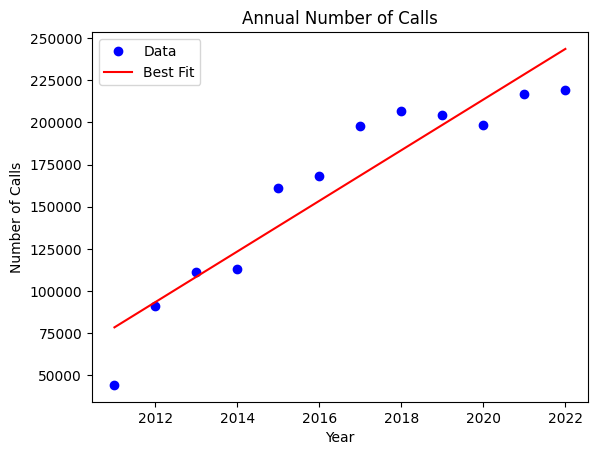

Estimated increase in calls per year: 15012.81818181756


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
boston_311_calls = pd.read_csv("boston_311_calls.csv")

# Convert 'open_dt' to datetime
boston_311_calls["open_dt"] = pd.to_datetime(boston_311_calls["open_dt"])

# Extract the year from the 'open_dt' column
boston_311_calls["year"] = boston_311_calls["open_dt"].dt.year

# Group by year and count the calls
annual_call_counts = boston_311_calls.groupby("year").size().reset_index(name="Call Count")

# Estimate the line of best fit
x = annual_call_counts["year"]
y = annual_call_counts["Call Count"]
coef = np.polyfit(x, y, 1)
poly1d_fn = np.poly1d(coef)

# Visualize the trend
plt.plot(x, y, 'bo', x, poly1d_fn(x), '-r')
plt.xlabel("Year")
plt.ylabel("Number of Calls")
plt.title("Annual Number of Calls")
plt.legend(["Data", "Best Fit"])
plt.show()

# Print the increase in calls per year
print(f"Estimated increase in calls per year: {coef[0]}")


In [9]:
import pandas as pd
from datetime import timedelta
from scipy.spatial.distance import cdist

# Load the data
boston_311_calls = pd.read_csv("boston_311_calls.csv")
boston_garbage_schedule = pd.read_csv("boston_02128_garbage_schedule.csv")

# Extract ZIP code from the "location" column
boston_311_calls["Zip Code"] = boston_311_calls["location"].str.extract(r"(\d{5})")

# Filter service requests from ZIP code "02128" with "Requests for Street Cleaning"
filtered_calls = boston_311_calls[
    (boston_311_calls["Zip Code"] == "02128") &
    (boston_311_calls["type"] == "Requests for Street Cleaning")
]

# Convert 'open_dt' to datetime
filtered_calls["open_dt"] = pd.to_datetime(filtered_calls["open_dt"])

# Determine the closest collection point using Euclidean distance
def find_closest_trashday(row, collection_points):
    distances = cdist(
        [[row["latitude"], row["longitude"]]],
        collection_points[["latitude", "longitude"]]
    )
    closest_point_index = distances.argmin()
    return collection_points.iloc[closest_point_index]["trashday"]

filtered_calls["trashday"] = filtered_calls.apply(
    lambda row: find_closest_trashday(row, boston_garbage_schedule),
    axis=1
)

# Convert 'trashday' to datetime
filtered_calls["trashday"] = pd.to_datetime(
    filtered_calls["trashday"],
    format="%A",
    errors="coerce"
).dt.dayofweek

# Calculate the days after garbage collection
filtered_calls["days_after_garbage_collection"] = (
    filtered_calls["open_dt"].dt.dayofweek - filtered_calls["trashday"]
) % 7

# Calculate the average days after garbage collection
average_days = filtered_calls["days_after_garbage_collection"].mean()

print(f"On average, requests for street cleaning are made {average_days} days after garbage collection.")


C:\Users\tanwe\AppData\Local\Temp\ipykernel_35120\2552278271.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_calls["open_dt"] = pd.to_datetime(filtered_calls["open_dt"])


On average, requests for street cleaning are made 2.3591893039049237 days after garbage collection.


C:\Users\tanwe\AppData\Local\Temp\ipykernel_35120\2552278271.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_calls["trashday"] = filtered_calls.apply(
C:\Users\tanwe\AppData\Local\Temp\ipykernel_35120\2552278271.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_calls["trashday"] = pd.to_datetime(
C:\Users\tanwe\AppData\Local\Temp\ipykernel_35120\2552278271.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [10]:
import pandas as pd
from datetime import timedelta
from scipy.spatial.distance import cdist

# Load the data
boston_311_calls = pd.read_csv("boston_311_calls.csv")
boston_garbage_schedule = pd.read_csv("boston_02128_garbage_schedule.csv")

# Extract ZIP code from the "location" column
boston_311_calls["Zip Code"] = boston_311_calls["location"].str.extract(r"(\d{5})")

# Filter service requests from ZIP code "02128" with "Requests for Street Cleaning"
filtered_calls = boston_311_calls[
    (boston_311_calls["Zip Code"] == "02128") &
    (boston_311_calls["type"] == "Requests for Street Cleaning")
].copy()

# Convert 'open_dt' to datetime
filtered_calls.loc[:, "open_dt"] = pd.to_datetime(filtered_calls["open_dt"])

# Determine the closest collection point using Euclidean distance
def find_closest_trashday(row, collection_points):
    distances = cdist(
        [[row["latitude"], row["longitude"]]],
        collection_points[["latitude", "longitude"]]
    )
    closest_point_index = distances.argmin()
    return collection_points.iloc[closest_point_index]["trashday"]

filtered_calls.loc[:, "trashday"] = filtered_calls.apply(
    lambda row: find_closest_trashday(row, boston_garbage_schedule),
    axis=1
)

# Convert 'trashday' to datetime
filtered_calls.loc[:, "trashday"] = pd.to_datetime(
    filtered_calls["trashday"],
    format="%A",
    errors="coerce"
).dt.dayofweek

# Calculate the days after garbage collection
filtered_calls.loc[:, "days_after_garbage_collection"] = (
    filtered_calls["open_dt"].dt.dayofweek - filtered_calls["trashday"]
) % 7

# Calculate the average days after garbage collection
average_days = filtered_calls["days_after_garbage_collection"].mean()

print(f"On average, requests for street cleaning are made {average_days} days after garbage collection.")


On average, requests for street cleaning are made 2.3591893039049237 days after garbage collection.
